In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as LA

In [4]:
df_train=pd.read_csv('fashionmnist/fashion-mnist_train.csv')
df_test=pd.read_csv('fashionmnist/fashion-mnist_test.csv')

In [5]:
# concat the above dfs and adjust the indices accordingly. They should be from 0 to 69999
df=pd.concat([df_train,df_test],ignore_index=True)

In [14]:
def projection(A,S):
	mat = A[S,:]
	u, s, v = np.linalg.svd(mat, full_matrices=False)
	print("svd done")
	component = (np.dot(u.T, np.dot(u, A.T))).T
	ans = A - component
	return ans

def union_a_b(S,t):
	for ele in t:
		if ele not in S:
			S.append(ele)
	return S

def volume_samp(A,s):
	t=2 #steps
	E=A
	m,n=A.shape
	S= []
	P=[0 for i in range(m)]

	for j in range(t):
		den = (np.linalg.norm(E))**2
		T=[]  
		for i in range(m):
			P[i] = (np.linalg.norm(E[i,:])**2)/den

		a=[i for i in range(len(A))] 
		T_index = np.random.choice(a, size = s//t, replace = False, p=P)
		S = union_a_b(S,T_index)
		if j<t-1:
			E = projection(A,S)
	return S

In [ ]:
coreset_ind = volume_samp(df.drop('label',axis=1).values,5000)

In [10]:
coreset = df.iloc[coreset_ind]
coreset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
28686,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9921,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15116,0,0,0,0,0,0,0,0,0,0,...,148,187,22,0,4,0,0,0,0,0
31453,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51755,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58590,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63192,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11169,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.metrics import rand_score
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
rand_score(coreset['label'], kmeans.fit_predict(coreset.drop('label',axis=1)))

0.8734231907420196

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

pca = PCA(n_components=2, random_state=42)
pca.fit(df.drop('label',axis=1))
label_encoder = LabelEncoder()
label_encoder.fit(df['label'])

LabelEncoder()

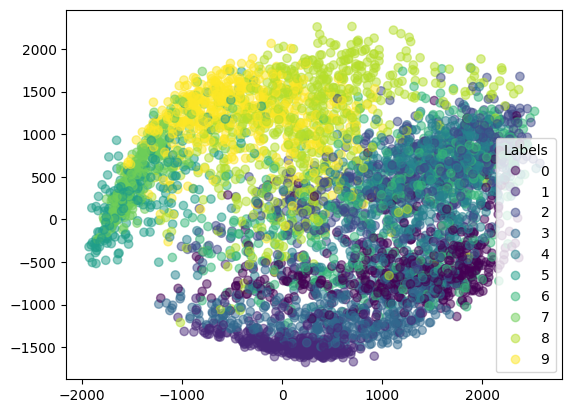

In [13]:
data_2d = pca.transform(coreset.drop('label',axis=1))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=coreset['label'], cmap='viridis', alpha=0.5)
unique_labels = np.unique(coreset['label'])
labels = label_encoder.transform(coreset['label'])
label_names = label_encoder.inverse_transform(unique_labels)
legend = plt.legend(*scatter.legend_elements(), title='Labels')
legend.texts = [plt.Text(0, 0, name) for name in label_names]
plt.show()